# Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%matplotlib inline

# Parameter estimation by optimization

When doing statistical inference, we speak the language of probability. A probability distribution that describes your data has parameters. So, a major goal of statistical inference is to estimate the values of these parameters, which allows us to concisely and unambiguously describe our data and draw conclusions from it. We will find the optimal parameters, those that best describe your data.


## Optimal parameters


> ### Optimal parameters
- Parameter values that bring the model in closest agreement with the data

> ### Packages to do statistical inference
| |package|
|---|---|
|<img src="https://docs.scipy.org/doc/scipy/reference/_static/img/scipy_org_logo.png" alt="scipy_org_logo" width="250">|`scipy.stats`|
|<img src="https://www.statsmodels.org/stable/_images/statsmodels-logo-v2-horizontal.svg" alt="statsmodels-logo-v2-horizontal" width="250">|`statsmodels`|
|<img src="https://numpy.org/images/logos/numpy.svg" alt="numpy" style="height:50px">| hacker stats with `numpy`|


### How often do we get no-hitters?


The number of games played between each no-hitter in the modern era ($1901-2015$) of Major League Baseball is stored in the array `nohitter_times.`

In [2]:
nohitter_times = np.array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
                           715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
                           104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
                           166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
                           308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
                           1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
                           77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
                           557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
                           1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
                           219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
                           176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
                           774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
                           192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
                           156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
                           576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
                           3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
                           110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
                           192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
                           1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
                           2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
                           1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
                           420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
                           876,  381,  905,  156,  419,  239,  119,  129,  467])

If we assume that no-hitters are described as a Poisson process, then the time between no-hitters is Exponentially distributed. As we have seen, the Exponential distribution has a single parameter, which we will call τ, the typical interval time. The value of the parameter τ that makes the exponential distribution best match the data is the mean interval time (where time is in units of number of games) between no-hitters.

We will compute the value of this parameter from the data. Then, `use np.random.exponential()` to "repeat" the history of Major League Baseball by drawing inter-no-hitter times from an exponential distribution with the τ we found and plot the histogram as an approximation to the PDF.

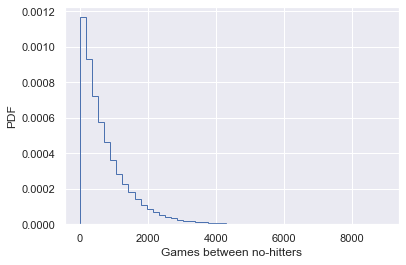

In [3]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, density=True, histtype="step")
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


> Note: We see the typical shape of the Exponential distribution, going from a maximum at 0 and decaying to the right.

### Do the data follow our story?

We have modeled no-hitters using an Exponential distribution. Let's create an ECDF of the real data. Overlay the theoretical CDF with the ECDF from the data. This helps us to verify that the Exponential distribution describes the observed data.

In [4]:
def ecdf(data):
    return np.sort(data), np.arange(1, len(data)+1) / len(data)

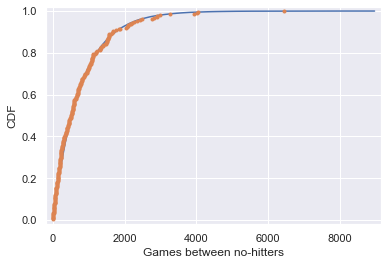

In [5]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker=".", linestyle="none")

# Margins and axis labels
plt.margins(.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()


It looks like no-hitters in the modern era of Major League Baseball are Exponentially distributed. Based on the story of the Exponential distribution, this suggests that they are a random process; when a no-hitter will happen is independent of when the last no-hitter was.

# How is this parameter optimal?

We will now sample out of an exponential distribution with $\tau$ being twice as large as the optimal $\tau$. Do it again for $\tau$ half as large. Make CDFs of these samples and overlay them with our data. 

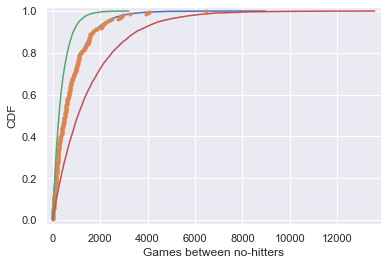

In [6]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, size=10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(tau*2, size=10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

> Note: Notice how the value of tau given by the mean matches the data best. In this way, tau is an optimal parameter.

We can see that they do not reproduce the data as well. Thus, the $\tau$ we computed from the mean inter-no-hitter times is optimal in that it best reproduces the data.

## Linear regression by least squares


> ### Least squares
- The process of nding the parameters for which the sum ofthe squares ofthe residuals is minimal

### EDA of literacy/fertility data

we will look at the correlation between female literacy and fertility (defined as the average number of children born per woman) throughout the world. For ease of analysis and interpretation, we will work with the illiteracy rate.

In [7]:
illiteracy= np.array([ 9.5, 49.2,  1. , 11.2,  9.8, 60. , 50.2, 51.2,  0.6,  1. ,  8.5,
                      6.1,  9.8,  1. , 42.2, 77.2, 18.7, 22.8,  8.5, 43.9,  1. ,  1. ,
                      1.5, 10.8, 11.9,  3.4,  0.4,  3.1,  6.6, 33.7, 40.4,  2.3, 17.2,
                      0.7, 36.1,  1. , 33.2, 55.9, 30.8, 87.4, 15.4, 54.6,  5.1,  1.1,
                      10.2, 19.8,  0. , 40.7, 57.2, 59.9,  3.1, 55.7, 22.8, 10.9, 34.7,
                      32.2, 43. ,  1.3,  1. ,  0.5, 78.4, 34.2, 84.9, 29.1, 31.3, 18.3,
                      81.8, 39. , 11.2, 67. ,  4.1,  0.2, 78.1,  1. ,  7.1,  1. , 29. ,
                      1.1, 11.7, 73.6, 33.9, 14. ,  0.3,  1. ,  0.8, 71.9, 40.1,  1. ,
                      2.1,  3.8, 16.5,  4.1,  0.5, 44.4, 46.3, 18.7,  6.5, 36.8, 18.6,
                      11.1, 22.1, 71.1,  1. ,  0. ,  0.9,  0.7, 45.5,  8.4,  0. ,  3.8,
                      8.5,  2. ,  1. , 58.9,  0.3,  1. , 14. , 47. ,  4.1,  2.2,  7.2,
                      0.3,  1.5, 50.5,  1.3,  0.6, 19.1,  6.9,  9.2,  2.2,  0.2, 12.3,
                      4.9,  4.6,  0.3, 16.5, 65.7, 63.5, 16.8,  0.2,  1.8,  9.6, 15.2,
                      14.4,  3.3, 10.6, 61.3, 10.9, 32.2,  9.3, 11.6, 20.7,  6.5,  6.7,
                      3.5,  1. ,  1.6, 20.5,  1.5, 16.7,  2. ,  0.9])

In [8]:
fertility = np.array([1.769, 2.682, 2.077, 2.132, 1.827, 3.872, 2.288, 5.173, 1.393,
       1.262, 2.156, 3.026, 2.033, 1.324, 2.816, 5.211, 2.1  , 1.781,
       1.822, 5.908, 1.881, 1.852, 1.39 , 2.281, 2.505, 1.224, 1.361,
       1.468, 2.404, 5.52 , 4.058, 2.223, 4.859, 1.267, 2.342, 1.579,
       6.254, 2.334, 3.961, 6.505, 2.53 , 2.823, 2.498, 2.248, 2.508,
       3.04 , 1.854, 4.22 , 5.1  , 4.967, 1.325, 4.514, 3.173, 2.308,
       4.62 , 4.541, 5.637, 1.926, 1.747, 2.294, 5.841, 5.455, 7.069,
       2.859, 4.018, 2.513, 5.405, 5.737, 3.363, 4.89 , 1.385, 1.505,
       6.081, 1.784, 1.378, 1.45 , 1.841, 1.37 , 2.612, 5.329, 5.33 ,
       3.371, 1.281, 1.871, 2.153, 5.378, 4.45 , 1.46 , 1.436, 1.612,
       3.19 , 2.752, 3.35 , 4.01 , 4.166, 2.642, 2.977, 3.415, 2.295,
       3.019, 2.683, 5.165, 1.849, 1.836, 2.518, 2.43 , 4.528, 1.263,
       1.885, 1.943, 1.899, 1.442, 1.953, 4.697, 1.582, 2.025, 1.841,
       5.011, 1.212, 1.502, 2.516, 1.367, 2.089, 4.388, 1.854, 1.748,
       2.978, 2.152, 2.362, 1.988, 1.426, 3.29 , 3.264, 1.436, 1.393,
       2.822, 4.969, 5.659, 3.24 , 1.693, 1.647, 2.36 , 1.792, 3.45 ,
       1.516, 2.233, 2.563, 5.283, 3.885, 0.966, 2.373, 2.663, 1.251,
       2.052, 3.371, 2.093, 2.   , 3.883, 3.852, 3.718, 1.732, 3.928])

It is always a good idea to do some EDA ahead of our analysis. To this end, we will plot the `fertility` versus `illiteracy` and compute the Pearson correlation coefficient. 


> Note: The Numpy array `illiteracy` has the illiteracy rate among females for most of the world's nations. 


> Note: The array `fertility` has the corresponding fertility data.

In [9]:
def pearson_r(x, y):
    return np.corrcoef(x, y)[0,1]

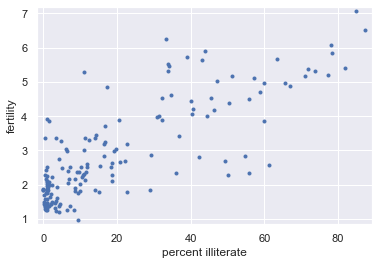

0.8041324026815346

In [10]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
pearson_r(illiteracy, fertility)


We can see the correlation between illiteracy and fertility by eye, and by the substantial Pearson correlation coefficient of 0.8. It is difficult to resolve in the scatter plot, but there are many points around near-zero illiteracy and about 1.8 children/woman.

### Linear regression

We will assume that fertility is a linear function of the female illiteracy rate. That is, $f=ai+b$, where $a$ is the **slope** and $b$ is the **intercept**.


> Note: We can think of the intercept as the minimal fertility rate, probably somewhere between one and two.


The slope tells us how the fertility rate varies with illiteracy. We can find the best fit line using `np.polyfit()`.

slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.8880506106365562 children per woman


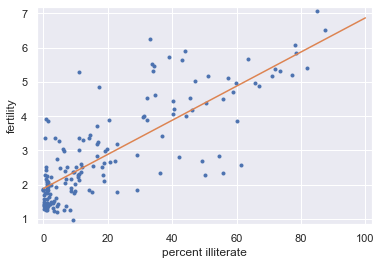

In [11]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, deg=1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()


### How is it optimal?

The function `np.polyfit()` that we used to get your regression parameters finds the optimal slope and intercept. It is optimizing the sum of the squares of the residuals, also known as RSS ( _for residual sum of squares_ ). 

We will plot the function that is being optimized, the RSS, versus the slope parameter $a$. To do this, we will fix the intercept to be what we found in the optimization. Then, plot the RSS vs. the slope. 

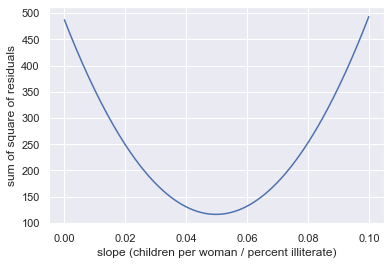

In [12]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0,0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()


> Note: that the minimum on the plot, that is the value of the slope that gives the minimum sum of the square of the residuals, is the same value you got when performing the regression.




## The importance of EDA: Anscombe's quartet

> ### Look before you leap!
- Do graphical EDA rst

### Linear regression on appropriate Anscombe data

We will perform a linear regression on the data set from Anscombe's quartet that is most reasonably interpreted with linear regression.

In [13]:
x = np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.])
y = np.array([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84,
        4.82,  5.68])

0.5000909090909091 3.000090909090908


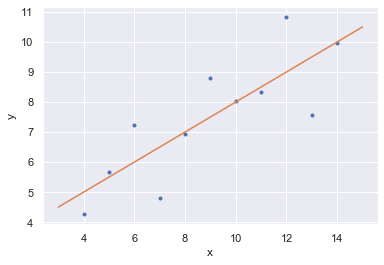

In [14]:
# Perform linear regression: a, b
a, b = np.polyfit(x,y, deg=1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x, y, marker=".", linestyle="none")
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

### Linear regression on all Anscombe data


Now, to verify that all four of the Anscombe data sets have the same slope and intercept from a linear regression, we will compute the slope and intercept for each set. 

In [15]:
anscombe_x = [np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 np.array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 np.array([ 8.,  8.,  8.,  8.,  8.,  8.,  8., 19.,  8.,  8.,  8.])]

In [16]:
anscombe_y = [np.array([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84,
         4.82,  5.68]),
 np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1 , 6.13, 3.1 , 9.13, 7.26, 4.74]),
 np.array([ 7.46,  6.77, 12.74,  7.11,  7.81,  8.84,  6.08,  5.39,  8.15,
         6.42,  5.73]),
 np.array([ 6.58,  5.76,  7.71,  8.84,  8.47,  7.04,  5.25, 12.5 ,  5.56,
         7.91,  6.89])]

The data are stored in lists;

In [17]:
# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x,y, deg=1)

    # Print the result
    print('slope:', a, 'intercept:', b)


slope: 0.5000909090909091 intercept: 3.000090909090908
slope: 0.5 intercept: 3.0009090909090905
slope: 0.4997272727272729 intercept: 3.002454545454545
slope: 0.4999090909090908 intercept: 3.001727272727274


> Important: Indeed, they all have the same slope and intercept.

# Bootstrap confidence intervals

To "pull yourself up by your bootstraps" is a classic idiom meaning that you achieve a difficult task by yourself with no help at all. In statistical inference, we want to know what would happen if we could repeat our data acquisition an infinite number of times. This task is impossible, but can we use only the data we actually have to get close to the same result as an infinitude of experiments? The answer is yes! The technique to do it is aptly called ***bootstrapping***. 

## Generating bootstrap replicates


> ### Bootstrapping
- The use of resampled data to perform statistical inference


> ### Bootstrap sample
- A resampled array ofthe data


> ### Bootstrap replicate
- A statistic computed from a resampled array

### Getting the terminology down


If we have a data set with $n$ repeated measurements, a **bootstrap sample** is an array of length $n$ that was drawn from the original data with replacement. **bootstrap replicate** is A single value of a statistic computed from a bootstrap sample.

### Visualizing bootstrap samples


We will generate bootstrap samples from the set of annual rainfall data measured at the Sheffield Weather Station in the UK from 1883 to 2015. 

In [18]:
rainfall = np.array([ 875.5,  648.2,  788.1,  940.3,  491.1,  743.5,  730.1,  686.5,
        878.8,  865.6,  654.9,  831.5,  798.1,  681.8,  743.8,  689.1,
        752.1,  837.2,  710.6,  749.2,  967.1,  701.2,  619. ,  747.6,
        803.4,  645.6,  804.1,  787.4,  646.8,  997.1,  774. ,  734.5,
        835. ,  840.7,  659.6,  828.3,  909.7,  856.9,  578.3,  904.2,
        883.9,  740.1,  773.9,  741.4,  866.8,  871.1,  712.5,  919.2,
        927.9,  809.4,  633.8,  626.8,  871.3,  774.3,  898.8,  789.6,
        936.3,  765.4,  882.1,  681.1,  661.3,  847.9,  683.9,  985.7,
        771.1,  736.6,  713.2,  774.5,  937.7,  694.5,  598.2,  983.8,
        700.2,  901.3,  733.5,  964.4,  609.3, 1035.2,  718. ,  688.6,
        736.8,  643.3, 1038.5,  969. ,  802.7,  876.6,  944.7,  786.6,
        770.4,  808.6,  761.3,  774.2,  559.3,  674.2,  883.6,  823.9,
        960.4,  877.8,  940.6,  831.8,  906.2,  866.5,  674.1,  998.1,
        789.3,  915. ,  737.1,  763. ,  666.7,  824.5,  913.8,  905.1,
        667.8,  747.4,  784.7,  925.4,  880.2, 1086.9,  764.4, 1050.1,
        595.2,  855.2,  726.9,  785.2,  948.8,  970.6,  896. ,  618.4,
        572.4, 1146.4,  728.2,  864.2,  793. ])

The data are stored in the NumPy array rainfall in units of millimeters (mm). By graphically displaying the bootstrap samples with an ECDF, we can get a feel for how bootstrap sampling allows probabilistic descriptions of data.

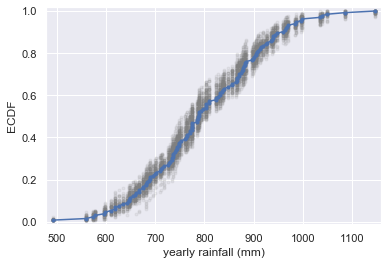

In [19]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

> Note: The bootstrap samples give an idea of how the distribution of rainfalls is spread.

## Bootstrap confidence intervals


> ### Condence interval of a statistic
- If we repeated measurements over and over again, $p\%$ of the observed values would lie within the $p\%$ condence interval.

### Generating many bootstrap replicates




In [20]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    return func(np.random.choice(data, size=len(data)))

We'll write another function, `draw_bs_reps(data, func, size=1)`, which generates many bootstrap replicates from the data set. 

In [21]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


### Bootstrap replicates of the mean and the SEM

We will compute a bootstrap estimate of the probability density function of the mean annual rainfall at the Sheffield Weather Station. 


> Note: we are estimating the mean annual rainfall we would get if the Sheffield Weather Station could repeat all of the measurements from 1883 to 2015 over and over again. This is a _probabilistic_ estimate of the mean. 


We will plot the PDF as a histogram, and you will see that it is Normal.

The standard deviation of this distribution, called the **standard error of the mean**, or SEM, is given by the standard deviation of the data divided by the square root of the number of data points. I.e., for a data set, `sem = np.std(data) / np.sqrt(len(data))`.

10.510549150506188
10.358764199574097


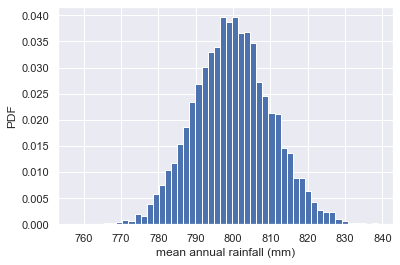

In [22]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, size=10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

> Note: SEM we got from the known expression and the bootstrap replicates is the same and the distribution of the bootstrap replicates of the mean is Normal.

### Confidence intervals of rainfall data


A _confidence interval_ gives upper and lower bounds on the range of parameter values you might expect to get if we repeat our measurements. For named distributions, we can compute them analytically or look them up, but one of the many beautiful properties of the bootstrap method is that we can take percentiles of your bootstrap replicates to get your confidence interval. Conveniently, we can use the `np.percentile()` function.

In [23]:
np.percentile(bs_replicates, [2.5, 97.5])

array([779.96900376, 820.62793233])

it's simple to get confidence intervals using bootstrap!

### Bootstrap replicates of other statistics


We'll generate bootstrap replicates for the variance of the annual rainfall at the Sheffield Weather Station and plot the histogram of the replicates.

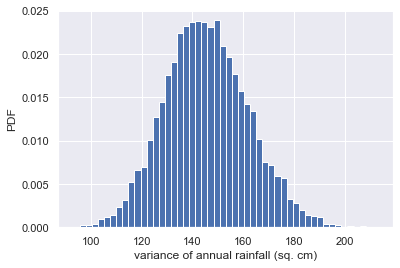

In [24]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, size=10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates/100

# Make a histogram of the results
_ = plt.hist(bs_replicates, density=True, bins=50)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

> Note: This is not normally distributed, as it has a longer tail to the right.

### Confidence interval on the rate of no-hitters

95% confidence interval = [663.65229084 869.79741036] games


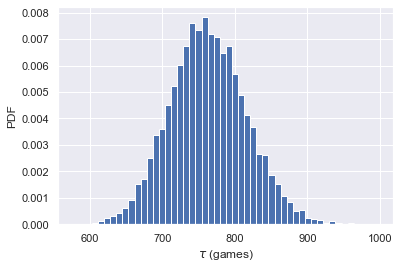

In [25]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, size=10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


> Note: This gives us an estimate of what the typical time between no-hitters is. It could be anywhere between 660 and 870 games.

## Pairs bootstrap


> ### Nonparametric inference
- Make no assumptions about the model or probability distribution underlying the data


> ### Pairs bootstrap for linear regression
- Resample data in pairs
- Compute slope and intercept from resampled data
- Each slope and intercept is a bootstrap replicate
- Compute condence intervals from percentiles of bootstrap replicates

### A function to do pairs bootstrap

pairs bootstrap involves resampling pairs of data. Each collection of pairs fit with a line, in this case using `np.polyfit()`. We do this again and again, getting bootstrap replicates of the parameter values. To have a useful tool for doing pairs bootstrap, we will write a function to perform pairs bootstrap on a set of `x,y` data.

In [26]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, deg=1)

    return bs_slope_reps, bs_intercept_reps


### Pairs bootstrap of literacy/fertility data

Using the function we just wrote, we'll perform pairs bootstrap to plot a histogram describing the estimate of the slope from the illiteracy/fertility data. Also reporting the 95% confidence interval of the slope.

[0.04389859 0.05528877]


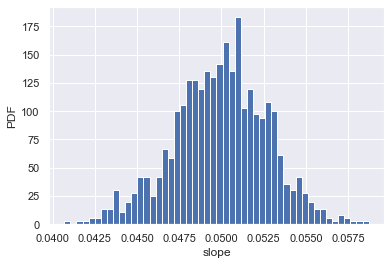

In [27]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, size=1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, density=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

### Plotting bootstrap regressions

A nice way to visualize the variability we might expect in a linear regression is to plot the line we would get from each bootstrap replicate of the slope and intercept. We'll do this for the first 100 of our bootstrap replicates of the slope and intercept

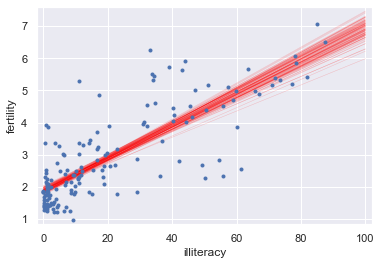

In [28]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker=".", linestyle="none")

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

# Introduction to hypothesis testing

how reasonable is it to observe our data if a model is true? This question is addressed by **hypothesis tests**. They are the icing on the inference cake. We carefully construct and test hypotheses using hacker statistics.

## Formulating and simulating a hypothesis


> ### Hypothesis testing
- Assessment of how reasonable the observed data are assuming a hypothesis is true

> ### Null hypothesis
- Another name for the hypothesis you are testing

> ### Permutation
- Random reordering of entries in an array

### Generating a permutation sample

permutation sampling is a great way to simulate the hypothesis that two variables have identical probability distributions. This is often a hypothesis you want to test, so we will write a function to generate a permutation sample from two data sets.

> Note: a permutation sample of two arrays having respectively `n1` and `n2` entries is constructed by concatenating the arrays together, scrambling the contents of the concatenated array, and then taking the first `n1` entries as the permutation sample of the first array and the last `n2` entries as the permutation sample of the second array.

In [29]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

### Visualizing permutation sampling

To help see how permutation sampling works, we will generate permutation samples and look at them graphically.


We will use the Sheffield Weather Station data again, this time considering the monthly rainfall in June (a dry month) and November (a wet month). We expect these might be differently distributed, so we will take permutation samples to see how their ECDFs _would look if_ they were identically distributed.

In [30]:
rain_june = np.array([ 66.2,  39.7,  76.4,  26.5,  11.2,  61.8,   6.1,  48.4,  89.2,
       104. ,  34. ,  60.6,  57.1,  79.1,  90.9,  32.3,  63.8,  78.2,
        27.5,  43.4,  30.1,  17.3,  77.5,  44.9,  92.2,  39.6,  79.4,
        66.1,  53.5,  98.5,  20.8,  55.5,  39.6,  56. ,  65.1,  14.8,
        13.2,  88.1,   8.4,  32.1,  19.6,  40.4,   2.2,  77.5, 105.4,
        77.2,  38. ,  27.1, 111.8,  17.2,  26.7,  23.3,  77.2,  87.2,
        27.7,  50.6,  60.3,  15.1,   6. ,  29.4,  39.3,  56.3,  80.4,
        85.3,  68.4,  72.5,  13.3,  28.4,  14.7,  37.4,  49.5,  57.2,
        85.9,  82.1,  31.8, 126.6,  30.7,  41.4,  33.9,  13.5,  99.1,
        70.2,  91.8,  61.3,  13.7,  54.9,  62.5,  24.2,  69.4,  83.1,
        44. ,  48.5,  11.9,  16.6,  66.4,  90. ,  34.9, 132.8,  33.4,
       225. ,   7.6,  40.9,  76.5,  48. , 140. ,  55.9,  54.1,  46.4,
        68.6,  52.2, 108.3,  14.6,  11.3,  29.8, 130.9, 152.4,  61. ,
        46.6,  43.9,  30.9, 111.1,  68.5,  42.2,   9.8, 285.6,  56.7,
       168.2,  41.2,  47.8, 166.6,  37.8,  45.4,  43.2])

In [31]:
rain_november = np.array([ 83.6,  30.9,  62.2,  37. ,  41. , 160.2,  18.2, 122.4,  71.3,
        44.2,  49.1,  37.6, 114.5,  28.8,  82.5,  71.9,  50.7,  67.7,
       112. ,  63.6,  42.8,  57.2,  99.1,  86.4,  84.4,  38.1,  17.7,
       102.2, 101.3,  58. ,  82. , 101.4,  81.4, 100.1,  54.6,  39.6,
        57.5,  29.2,  48.8,  37.3, 115.4,  55.6,  62. ,  95. ,  84.2,
       118.1, 153.2,  83.4, 104.7,  59. ,  46.4,  50. , 147.6,  76.8,
        59.9, 101.8, 136.6, 173. ,  92.5,  37. ,  59.8, 142.1,   9.9,
       158.2,  72.6,  28. , 112.9, 119.3, 199.2,  50.7,  44. , 170.7,
        67.2,  21.4,  61.3,  15.6, 106. , 116.2,  42.3,  38.5, 132.5,
        40.8, 147.5,  93.9,  71.4,  87.3, 163.7, 141.4,  62.6,  84.9,
        28.8, 121.1,  28.6,  32.4, 112. ,  50. ,  96.9,  81.8,  70.4,
       117.5,  41.2, 124.9,  78.2,  93. ,  53.5,  50.5,  42.6,  47.9,
        73.1, 129.1,  56.9, 103.3,  60.5, 134.3,  93.1,  49.5,  48.2,
       167.9,  27. , 111.1,  55.4,  36.2,  57.4,  66.8,  58.3,  60. ,
       161.6, 112.7,  37.4, 110.6,  56.6,  95.8, 126.8])

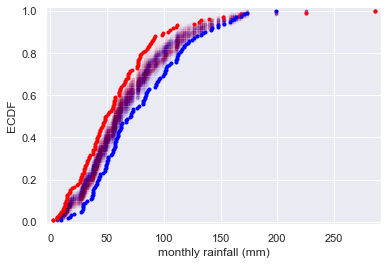

In [32]:
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

> Note: The permutation samples ECDFs overlap and give a purple haze. None of the ECDFs from the permutation samples overlap with the observed data, suggesting that the hypothesis is not commensurate with the data. June and November rainfall are not identically distributed.

## Test statistics and p-values

> ### Hypothesis testing
- Assessment of how reasonable the observed data are assuming a hypothesis is true


> ### Test statistic
- A single number that can be computed from observed data and from data you simulate under the null hypothesis
- It serves as a basis of comparison between the two

> ### p-value
- The probability of obtaining a value of your test statistic that is at least as extreme as what was observed, under the assumption the null hypothesis is true
- **NOT** the probability that the null hypothesis is true

> ### Statistical signicance
- Determined by the smallness of a p-value

> ### Null hypothesis signicance testing (NHST)
- Another name for Hypothesis testing

### Test statistics

When performing hypothesis tests, the choice of test statistic should be pertinent to the question you are seeking to answer in your hypothesis test.

> Important: The most important thing to consider is: What are you asking?

### p-value

The p-value is generally a measure of the probability of observing a test statistic equally or more extreme than the one you observed, given that the null hypothesis is true.

### Generating permutation replicates

a permutation replicate is a single value of a statistic computed from a permutation sample.

As the `draw_bs_reps()` function is useful for generating bootstrap replicates, it is useful to have a similar function, `draw_perm_reps()`, to generate permutation replicates.

In [33]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

### Look before you leap: EDA before hypothesis testing

Kleinteich and Gorb (_Sci._ Rep., 4, 5225, 2014) performed an interesting experiment with South American horned frogs. They held a plate connected to a force transducer, along with a bait fly, in front of them. They then measured the impact force and adhesive force of the frog's tongue when it struck the target.

Frog A is an adult and Frog B is a juvenile. The researchers measured the impact force of 20 strikes for each frog. we will test the hypothesis that the two frogs have the same distribution of impact forces. it is important to do EDA first! Let's make a bee swarm plot for the data. 

They are stored in a Pandas data frame, `frogs`, where column `ID` is the identity of the frog and column `impact_force` is the impact force in Newtons (N).

In [34]:
frogs = pd.read_csv("datasets/frogs.csv")
frogs.head()

,ID,impact_force
0,A,1.612
1,A,0.605
2,A,0.327
3,A,0.946
4,A,0.541


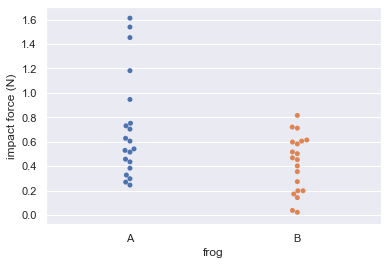

In [35]:
# Make bee swarm plot
_ = sns.swarmplot(data=frogs, x="ID", y="impact_force")

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()


Eyeballing it, it does not look like they come from the same distribution. Frog A, the adult, has three or four very hard strikes, and Frog B, the juvenile, has a couple weak ones. However, it is possible that with only 20 samples it might be too difficult to tell if they have difference distributions, so we should proceed with the hypothesis test.

### Permutation test on frog data

In [36]:
frogs[frogs.ID=="A"].impact_force.mean()

0.70735

In [37]:
frogs[frogs.ID=="B"].impact_force.mean()

0.4191000000000001

In [38]:
frogs[frogs.ID=="A"].impact_force.mean() - frogs[frogs.ID=="B"].impact_force.mean()

0.28824999999999995

The average strike force of Frog A was 0.71 Newtons (N), and that of Frog B was 0.42 N for a difference of 0.29 N. It is possible the frogs strike with the same force and this observed difference was by chance.

In [39]:
force_a = np.array([1.612, 0.605, 0.327, 0.946, 0.541, 1.539, 0.529, 0.628, 1.453,
       0.297, 0.703, 0.269, 0.751, 0.245, 1.182, 0.515, 0.435, 0.383,
       0.457, 0.73 ])
force_b = np.array([0.172, 0.142, 0.037, 0.453, 0.355, 0.022, 0.502, 0.273, 0.72 ,
       0.582, 0.198, 0.198, 0.597, 0.516, 0.815, 0.402, 0.605, 0.711,
       0.614, 0.468])

 We will compute the probability of getting at least a 0.29 N difference in mean strike force under the hypothesis that the distributions of strike forces for the two frogs are identical. We use a permutation test with a test statistic of the difference of means to test this hypothesis.

In [40]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff


In [41]:

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

empirical_diff_means

0.28825000000000006

In [42]:

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0058


The p-value tells us that there is about a 0.6% chance that we would get the difference of means observed in the experiment if frogs were exactly the same. A p-value below 0.01 is typically said to be "statistically significant," but: 

> Warning: Warning! warning! warning! We have computed a p-value; it is a number. I encourage you not to distill it to a yes-or-no phrase. p = 0.006 and p = 0.000000006 are both said to be "statistically significant," but they are definitely not the same!

## Bootstrap hypothesis tests


> Pipeline for hypothesis testing
- Clearly state the null hypothesis
- Define your test statistic
- Generate many sets of simulated data assuming the null hypothesis is true
- Compute the test statistic for each simulated data set
- The p-value is the fraction of your simulated data sets for which the test statistic is at least as extreme as for the real data

### A one-sample bootstrap hypothesis test

Another juvenile frog was studied, Frog C, and we want to see if Frog B and Frog C have similar impact forces. Unfortunately, we do not have Frog C's impact forces available, but we know they have a mean of 0.55 N. Because we don't have the original data, we cannot do a permutation test, and we cannot assess the hypothesis that the forces from Frog B and Frog C come from the same distribution. We will therefore test another, less restrictive hypothesis: The mean strike force of Frog B is equal to that of Frog C.

To set up the bootstrap hypothesis test, we will take the mean as our test statistic. Our goal is to calculate the probability of getting a mean impact force less than or equal to what was observed for Frog B _if the hypothesis that the true mean of Frog B's impact forces is equal to that of Frog C is true_. We will first translate all of the data of Frog B such that the mean is 0.55 N. This involves adding the mean force of Frog C and subtracting the mean force of Frog B from each measurement of Frog B. This leaves other properties of Frog B's distribution, such as the variance, unchanged.

In [43]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b) + 0.55

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)


p =  0.0046


The low p-value suggests that the null hypothesis that Frog B and Frog C have the same mean impact force is false.

### A two-sample bootstrap hypothesis test for difference of means

We now want to test the hypothesis that Frog A and Frog B have the same mean impact force, but not necessarily the same distribution, which is also impossible with a permutation test.

To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.

In [44]:
forces_concat = np.array([1.612, 0.605, 0.327, 0.946, 0.541, 1.539, 0.529, 0.628, 1.453,
       0.297, 0.703, 0.269, 0.751, 0.245, 1.182, 0.515, 0.435, 0.383,
       0.457, 0.73 , 0.172, 0.142, 0.037, 0.453, 0.355, 0.022, 0.502,
       0.273, 0.72 , 0.582, 0.198, 0.198, 0.597, 0.516, 0.815, 0.402,
       0.605, 0.711, 0.614, 0.468])

In [45]:
empirical_diff_means = 0.28825000000000006

# Hypothesis test examples

Hypothesis testing can be a bit tricky. We need to define the null hypothesis, figure out how to simulate it, and define clearly what it means to be "more extreme" in order to compute the p-value. Like any skill, practice makes perfect.

## A/B testing

> ### A/B test
- Used by organizations to see if a strategy change gives a better result


> ### Null hypothesis of an A/B test
- The test statistic is impervious to the change

### The vote for the Civil Rights Act in 1964


The Civil Rights Act of 1964 was one of the most important pieces of legislation ever passed in the USA. Excluding "present" and "abstain" votes, 153 House Democrats and 136 Republicans voted yea. However, 91 Democrats and 35 Republicans voted nay. Did party affiliation make a difference in the vote?


To answer this question, we will evaluate the hypothesis that the party of a House member has no bearing on his or her vote. We will use the fraction of Democrats voting in favor as our test statistic and evaluate the probability of observing a fraction of Democrats voting in favor at least as small as the observed fraction of 153/244. (That's right, at least as _small as_. In 1964, it was the Democrats who were less progressive on civil rights issues.) To do this, we will permute the party labels of the House voters and then arbitrarily divide them into "Democrats" and "Republicans" and compute the fraction of Democrats voting yea.

In [46]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True]*136 + [False]*35)

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, size=10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0002


This small p-value suggests that party identity had a lot to do with the voting. Importantly, the South had a higher fraction of Democrat representatives, and consequently also a more racist bias.

### A time-on-website analog

It turns out that we already did a hypothesis test analogous to an A/B test where we are interested in how much time is spent on the website before and after an ad campaign. The frog tongue force (a continuous quantity like time on the website) is an analog. "Before" = Frog A and "after" = Frog B. Let's practice this again with something that actually is a before/after scenario.

We return to the no-hitter data set. In 1920, Major League Baseball implemented important rule changes that ended the so-called dead ball era. Importantly, the pitcher was no longer allowed to spit on or scuff the ball, an activity that greatly favors pitchers. In this problem we will perform an A/B test to determine if these rule changes resulted in a slower rate of no-hitters (i.e., longer average time between no-hitters) using the difference in mean inter-no-hitter time as our test statistic. The inter-no-hitter times for the respective eras are stored in the arrays `nht_dead` and `nht_live`, where "nht" is meant to stand for "no-hitter time."

In [47]:
nht_dead = np.array([  -1,  894,   10,  130,    1,  934,   29,    6,  485,  254,  372,
         81,  191,  355,  180,  286,   47,  269,  361,  173,  246,  492,
        462, 1319,   58,  297,   31, 2970,  640,  237,  434,  570,   77,
        271,  563, 3365,   89,    0,  379,  221,  479,  367,  628,  843,
       1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,  715,
        966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,  104,
       1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,  166,
         96,  702,   23,  524,   26,  299,   59,   39,   12,    2,  308,
       1114,  813,  887])

In [48]:
nht_live = np.array([ 645, 2088,   42, 2090,   11,  886, 1665, 1084, 2900, 2432,  750,
       4021, 1070, 1765, 1322,   26,  548, 1525,   77, 2181, 2752,  127,
       2147,  211,   41, 1575,  151,  479,  697,  557, 2267,  542,  392,
         73,  603,  233,  255,  528,  397, 1529, 1023, 1194,  462,  583,
         37,  943,  996,  480, 1497,  717,  224,  219, 1531,  498,   44,
        288,  267,  600,   52,  269, 1086,  386,  176, 2199,  216,   54,
        675, 1243,  463,  650,  171,  327,  110,  774,  509,    8,  197,
        136,   12, 1124,   64,  380,  811,  232,  192,  731,  715,  226,
        605,  539, 1491,  323,  240,  179,  702,  156,   82, 1397,  354,
        778,  603, 1001,  385,  986,  203,  149,  576,  445,  180, 1403,
        252,  675, 1351, 2983, 1568,   45,  899, 3260, 1025,   31,  100,
       2055, 4043,   79,  238, 3931, 2351,  595,  110,  215,    0,  563,
        206,  660,  242,  577,  179,  157,  192,  192, 1848,  792, 1693,
         55,  388,  225, 1134, 1172, 1555,   31, 1582, 1044,  378, 1687,
       2915,  280,  765, 2819,  511, 1521,  745, 2491,  580, 2072, 6450,
        578,  745, 1075, 1103, 1549, 1520,  138, 1202,  296,  277,  351,
        391,  950,  459,   62, 1056, 1128,  139,  420,   87,   71,  814,
        603, 1349,  162, 1027,  783,  326,  101,  876,  381,  905,  156,
        419,  239,  119,  129,  467])

In [49]:
# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_dead, nht_live)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead, nht_live, diff_of_means, size=10000)


# Compute and print the p-value: p
p = sum(perm_replicates <= nht_diff_obs)/len(perm_replicates)
print('p-val =', p)

p-val = 0.0002


our p-value is 0.0001, which means that only one out of your 10,000 replicates had a result as extreme as the actual difference between the dead ball and live ball eras. This suggests strong statistical significance. 

> Warning: Watch out, though, we could very well have gotten zero replicates that were as extreme as the observed value. This just means that the p-value is quite small, almost certainly smaller than 0.001.

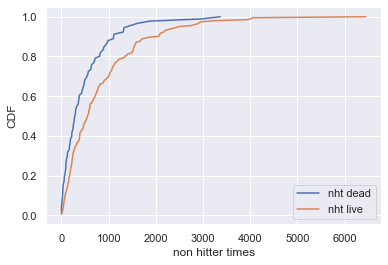

In [50]:
x_dead, y_dead = ecdf(nht_dead)
x_live, y_live = ecdf(nht_live)

_ = plt.plot(x_dead, y_dead)
_ = plt.plot(x_live, y_live)
_ = plt.xlabel("non hitter times")
_ = plt.legend(["nht dead", "nht live"])
_ = plt.ylabel("CDF")
plt.show()

## Test of correlation

> ### Hypothesis test of correlation
- Posit null hypothesis:the two variables are completely uncorrelated
- Simulate data assuming null hypothesis is true
- Use Pearson correlation, $\rho$, as test statistic
- Compute p-value as fraction of replicates that have ρ at least as large as observed.

### Simulating a null hypothesis concerning correlation

The observed correlation between female illiteracy and fertility in the data set of 162 countries may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. We will test this null hypothesis.

To do the test, we need to simulate the data assuming the null hypothesis is true. The best way to it is to Do a permutation test: Permute the illiteracy values but leave the fertility values fixed to generate a new set of (illiteracy, fertility) data.

### Hypothesis test on Pearson correlation

The observed correlation between female illiteracy and fertility may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. We will test this hypothesis. To do so, we'll permute the illiteracy values but leave the fertility values fixed. This simulates the hypothesis that they are totally independent of each other. For each permutation, we'll compute the Pearson correlation coefficient and assess how many of the permutation replicates have a Pearson correlation coefficient greater than the observed one.

In [51]:
# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy, fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


We got a p-value of zero. In hacker statistics, this means that the p-value is very low, since we never got a single replicate in the 10,000 we took that had a Pearson correlation greater than the observed one. we could try increasing the number of replicates you take to continue to move the upper bound on the p-value lower and lower.

### Do neonicotinoid insecticides have unintended consequences?

We will investigate the effects of neonicotinoid insecticides on bee reproduction. These insecticides are very widely used in the United States to combat aphids and other pests that damage plants.

In a recent study, Straub, et al. ([_Proc. Roy. Soc. B, 2016_](http://dx.doi.org/10.1098/rspb.2016.0506)) investigated the effects of neonicotinoids on the sperm of pollinating bees. In this and the next exercise, you will study how the pesticide treatment affected the count of live sperm per half milliliter of semen.

First, we will do EDA, as usual. Plot ECDFs of the alive sperm count for untreated bees (stored in the Numpy array `control`) and bees treated with pesticide (stored in the Numpy array `treated`).

In [52]:
control = np.array([ 4.159234,  4.408002,  0.172812,  3.498278,  3.104912,  5.164174,
        6.615262,  4.633066,  0.170408,  2.65    ,  0.0875  ,  1.997148,
        6.92668 ,  4.574932,  3.896466,  5.209814,  3.70625 ,  0.      ,
        4.62545 ,  3.01444 ,  0.732652,  0.4     ,  6.518382,  5.225   ,
        6.218742,  6.840358,  1.211308,  0.368252,  3.59937 ,  4.212158,
        6.052364,  2.115532,  6.60413 ,  5.26074 ,  6.05695 ,  6.481172,
        3.171522,  3.057228,  0.218808,  5.215112,  4.465168,  2.28909 ,
        3.732572,  2.17087 ,  1.834326,  6.074862,  5.841978,  8.524892,
        4.698492,  2.965624,  2.324206,  3.409412,  4.830726,  0.1     ,
        0.      ,  4.101432,  3.478162,  1.009688,  4.999296,  4.32196 ,
        0.299592,  3.606032,  7.54026 ,  4.284024,  0.057494,  6.036668,
        2.924084,  4.150144,  1.256926,  4.666502,  4.806594,  2.52478 ,
        2.027654,  2.52283 ,  4.735598,  2.033236,  0.      ,  6.177294,
        2.601834,  3.544408,  3.6045  ,  5.520346,  4.80698 ,  3.002478,
        3.559816,  7.075844, 10.      ,  0.139772,  6.17171 ,  3.201232,
        8.459546,  0.17857 ,  7.088276,  5.496662,  5.415086,  1.932282,
        3.02838 ,  7.47996 ,  1.86259 ,  7.838498,  2.242718,  3.292958,
        6.363644,  4.386898,  8.47533 ,  4.156304,  1.463956,  4.533628,
        5.573922,  1.29454 ,  7.547504,  3.92466 ,  5.820258,  4.118522,
        4.125   ,  2.286698,  0.591882,  1.273124,  0.      ,  0.      ,
        0.      , 12.22502 ,  7.601604,  5.56798 ,  1.679914,  8.77096 ,
        5.823942,  0.258374,  0.      ,  5.899236,  5.486354,  2.053148,
        3.25541 ,  2.72564 ,  3.364066,  2.43427 ,  5.282548,  3.963666,
        0.24851 ,  0.347916,  4.046862,  5.461436,  4.066104,  0.      ,
        0.065   ])

In [53]:
treated = np.array([1.342686, 1.058476, 3.793784, 0.40428 , 4.528388, 2.142966,
       3.937742, 0.1375  , 6.919164, 0.      , 3.597812, 5.196538,
       2.78955 , 2.3229  , 1.090636, 5.323916, 1.021618, 0.931836,
       2.78    , 0.412202, 1.180934, 2.8674  , 0.      , 0.064354,
       3.008348, 0.876634, 0.      , 4.971712, 7.280658, 4.79732 ,
       2.084956, 3.251514, 1.9405  , 1.566192, 0.58894 , 5.219658,
       0.977976, 3.124584, 1.297564, 1.433328, 4.24337 , 0.880964,
       2.376566, 3.763658, 1.918426, 3.74    , 3.841726, 4.69964 ,
       4.386876, 0.      , 1.127432, 1.845452, 0.690314, 4.185602,
       2.284732, 7.237594, 2.185148, 2.799124, 3.43218 , 0.63354 ,
       1.142496, 0.586   , 2.372858, 1.80032 , 3.329306, 4.028804,
       3.474156, 7.508752, 2.032824, 1.336556, 1.906496, 1.396046,
       2.488104, 4.759114, 1.07853 , 3.19927 , 3.814252, 4.275962,
       2.817056, 0.552198, 3.27194 , 5.11525 , 2.064628, 0.      ,
       3.34101 , 6.177322, 0.      , 3.66415 , 2.352582, 1.531696])

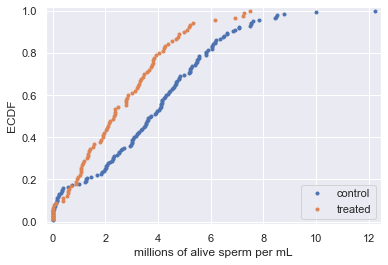

In [54]:
# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()


The ECDFs show a pretty clear difference between the treatment and control; treated bees have fewer alive sperm. Let's now do a hypothesis test.

### Bootstrap hypothesis test on bee sperm counts

We will test the following hypothesis: On average, male bees treated with neonicotinoid insecticide have the same number of active sperm per milliliter of semen than do untreated male bees. We will use the difference of means as the test statistic.

In [55]:
# Compute the difference in mean sperm count: diff_means
diff_means = np.mean(control) - np.mean(treated)

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((control, treated)))

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted,
                       np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted,
                       np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)
print('p-value =', p)


p-value = 0.0


The p-value is small, most likely less than 0.0001, since we never saw a bootstrap replicated with a difference of means at least as extreme as what was observed.

# a case study

Every year for the past 40-plus years, Peter and Rosemary Grant have gone to the Galápagos island of Daphne Major and collected data on Darwin's finches. Using skills in statistical inference, we will explorer the data, and witness first hand, through data, evolution in action.

### EDA of beak depths of Darwin's finches

For our first foray into the Darwin finch data, we will study how the beak depth (the distance, top to bottom, of a closed beak) of the finch species _Geospiza scandens_ has changed over time. The Grants have noticed some changes of beak geometry depending on the types of seeds available on the island, and they also noticed that there was some interbreeding with another major species on Daphne Major, _Geospiza fortis_. These effects can lead to changes in the species over time.

We will look at the beak depth of _G. scandens_ on Daphne Major in 1975 and in 2012. To start with, let's plot all of the beak depth measurements in 1975 and 2012 in a bee swarm plot.

In [56]:
dfd = pd.read_csv("datasets/darwin_finch_data.csv")
dfd.head()

,beak_depth,year
0,8.4,1975
1,8.8,1975
2,8.4,1975
3,8.0,1975
4,7.9,1975


In [57]:
dfd.tail()

,beak_depth,year
209,9.3,2012
210,9.8,2012
211,8.9,2012
212,9.8,2012
213,9.1,2012


In [58]:
dfd.dtypes

beak_depth    float64
year            int64
dtype: object

In [59]:
dfd.describe().T

,count,mean,std,min,25%,50%,75%,max
beak_depth,214.0,9.094252,0.637941,7.7,8.6625,9.075,9.5,11.0
year,214.0,1996.957944,18.216566,1975.0,1975.0000,2012.000,2012.0,2012.0


In [60]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   beak_depth  214 non-null    float64
 1   year        214 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 3.5 KB


The units of beak depth are millimeters (mm).

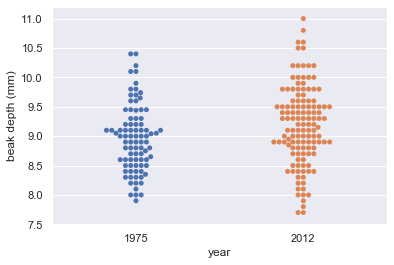

In [61]:
# Create bee swarm plot
_ = sns.swarmplot(data=dfd, x="year", y="beak_depth")

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

# Show the plot
plt.show()

It is kind of hard to see if there is a clear difference between the 1975 and 2012 data set. Eyeballing it, it appears as though the mean of the 2012 data set might be slightly higher, and it might have a bigger variance.

### ECDFs of beak depths

While bee swarm plots are useful, we found that ECDFs are often even better when doing EDA. Plot the ECDFs for the 1975 and 2012 beak depth measurements on the same plot.

In [62]:
bd_1975 = dfd.beak_depth[dfd.year==1975]
bd_2012 = dfd.beak_depth[dfd.year==2012]

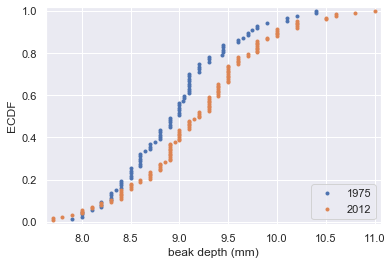

In [63]:
# Compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

The differences are much clearer in the ECDF. The mean is larger in the 2012 data, and the variance does appear larger as well.

### Parameter estimates of beak depths

Let's estimate the difference of the mean beak depth of the _G. scandens_ samples from 1975 and 2012 and report a 95% confidence interval.

In [64]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(bd_2012, np.mean, size=10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.22622047244094645 mm
95% confidence interval = [0.05967226 0.38944932] mm


### Hypothesis test: Are beaks deeper in 2012?

Our plot of the ECDF and determination of the confidence interval make it pretty clear that the beaks of _G. scandens_ on Daphne Major have gotten deeper. But is it possible that this effect is just due to random chance? In other words, what is the probability that we would get the observed difference in mean beak depth if the means were the same?


> Warning: The hypothesis we are testing is not that the beak depths come from the same distribution. For that we could use a permutation test. The hypothesis is that the means are equal. To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.

In [65]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, size=10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)


p = 0.0046


We get a p-value of 0.0038, which suggests that there is a statistically significant difference. But remember: it is very important to know how different they are! We got a difference of 0.2 mm between the means. We should combine this with the statistical significance. Changing by 0.2 mm in 37 years is substantial by evolutionary standards. If it kept changing at that rate, the beak depth would double in only 400 years.

## Variation in beak shapes

### EDA of beak length and depth



In [66]:
bl_1975 = np.array([13.9 , 14.  , 12.9 , 13.5 , 12.9 , 14.6 , 13.  , 14.2 , 14.  ,
       14.2 , 13.1 , 15.1 , 13.5 , 14.4 , 14.9 , 12.9 , 13.  , 14.9 ,
       14.  , 13.8 , 13.  , 14.75, 13.7 , 13.8 , 14.  , 14.6 , 15.2 ,
       13.5 , 15.1 , 15.  , 12.8 , 14.9 , 15.3 , 13.4 , 14.2 , 15.1 ,
       15.1 , 14.  , 13.6 , 14.  , 14.  , 13.9 , 14.  , 14.9 , 15.6 ,
       13.8 , 14.4 , 12.8 , 14.2 , 13.4 , 14.  , 14.8 , 14.2 , 13.5 ,
       13.4 , 14.6 , 13.5 , 13.7 , 13.9 , 13.1 , 13.4 , 13.8 , 13.6 ,
       14.  , 13.5 , 12.8 , 14.  , 13.4 , 14.9 , 15.54, 14.63, 14.73,
       15.73, 14.83, 15.94, 15.14, 14.23, 14.15, 14.35, 14.95, 13.95,
       14.05, 14.55, 14.05, 14.45, 15.05, 13.25])

In [67]:
bl_2012 = np.array([14.3 , 12.5 , 13.7 , 13.8 , 12.  , 13.  , 13.  , 13.6 , 12.8 ,
       13.6 , 12.95, 13.1 , 13.4 , 13.9 , 12.3 , 14.  , 12.5 , 12.3 ,
       13.9 , 13.1 , 12.5 , 13.9 , 13.7 , 12.  , 14.4 , 13.5 , 13.8 ,
       13.  , 14.9 , 12.5 , 12.3 , 12.8 , 13.4 , 13.8 , 13.5 , 13.5 ,
       13.4 , 12.3 , 14.35, 13.2 , 13.8 , 14.6 , 14.3 , 13.8 , 13.6 ,
       12.9 , 13.  , 13.5 , 13.2 , 13.7 , 13.1 , 13.2 , 12.6 , 13.  ,
       13.9 , 13.2 , 15.  , 13.37, 11.4 , 13.8 , 13.  , 13.  , 13.1 ,
       12.8 , 13.3 , 13.5 , 12.4 , 13.1 , 14.  , 13.5 , 11.8 , 13.7 ,
       13.2 , 12.2 , 13.  , 13.1 , 14.7 , 13.7 , 13.5 , 13.3 , 14.1 ,
       12.5 , 13.7 , 14.6 , 14.1 , 12.9 , 13.9 , 13.4 , 13.  , 12.7 ,
       12.1 , 14.  , 14.9 , 13.9 , 12.9 , 14.6 , 14.  , 13.  , 12.7 ,
       14.  , 14.1 , 14.1 , 13.  , 13.5 , 13.4 , 13.9 , 13.1 , 12.9 ,
       14.  , 14.  , 14.1 , 14.7 , 13.4 , 13.8 , 13.4 , 13.8 , 12.4 ,
       14.1 , 12.9 , 13.9 , 14.3 , 13.2 , 14.2 , 13.  , 14.6 , 13.1 ,
       15.2 ])

The beak length data are stored as `bl_1975` and `bl_2012`, again with units of millimeters (mm). We still have the beak depth data stored in `bd_1975` and `bd_2012`. We will make scatter plots of beak depth (y-axis) versus beak length (x-axis) for the 1975 and 2012 specimens.

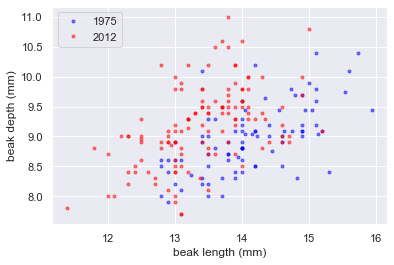

In [68]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='None', alpha=0.5, color="blue")

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
            linestyle='None', alpha=0.5, color="red")

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

In looking at the plot, we see that beaks got deeper (the red points are higher up in the y-direction), but not really longer. If anything, they got a bit shorter, since the red dots are to the left of the blue dots. So, it does not look like the beaks kept the same shape; they became shorter and deeper.

### Linear regressions

We perform a linear regression for both the 1975 and 2012 data. Then, perform pairs bootstrap estimates for the regression parameters. Report 95% confidence intervals on the slope and intercept of the regression line.

In [69]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975.values, deg=1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012.values, deg=1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = \
        draw_bs_pairs_linreg(bl_1975, bd_1975.values, size=1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = \
        draw_bs_pairs_linreg(bl_2012, bd_2012.values, size=1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975, [2.5, 97.5])

intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, [2.5, 97.5])


# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.46520516916059357 conf int = [0.3254032  0.58811989]
1975: intercept = 2.3908752365842285 conf int = [0.67000784 4.40072329]
2012: slope = 0.4626303588353126 conf int = [0.33989291 0.60535488]
2012: intercept = 2.9772474982360184 conf int = [1.03792858 4.62029259]


It looks like they have the same slope, but different intercepts.

### Displaying the linear regression results

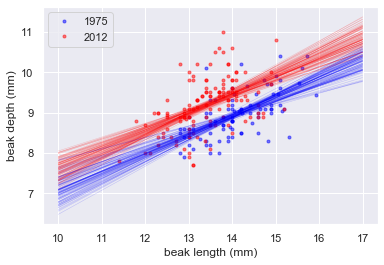

In [70]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, x* bs_slope_reps_1975[i] + bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color="blue")
    plt.plot(x, x*bs_slope_reps_2012[i] + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color="red")

# Draw the plot again
plt.show()

### Beak length to depth ratio

The linear regressions showed interesting information about the beak geometry. The slope was the same in 1975 and 2012, suggesting that for every millimeter gained in beak length, the birds gained about half a millimeter in depth in both years. However, if we are interested in the shape of the beak, we want to compare the ratio of beak length to beak depth. Let's make that comparison.

In [71]:
# Compute length-to-depth ratios
ratio_1975 = bl_1975/bd_1975
ratio_2012 = bl_2012/bd_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, size=10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [.5, 99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)


1975: mean ratio = 1.5788823771858533 conf int = [1.55672661 1.60112763]
2012: mean ratio = 1.4658342276847767 conf int = [1.44471693 1.48753163]


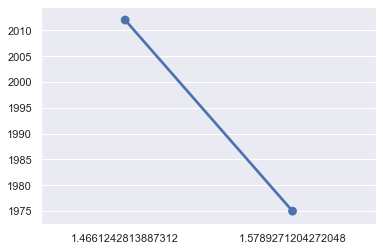

In [75]:
_ = sns.pointplot([np.median(conf_int_1975), np.median(conf_int_2012)], [1975, 2012])
plt.show()

## Calculation of heritability


> ### Heredity
- The tendency for parental traits to be inherited by offspring


### EDA of heritability

The array `bd_parent_scandens` contains the average beak depth (in mm) of two parents of the species _G. scandens_

In [76]:
bd_parent_scandens = np.array([ 8.3318,  8.4035,  8.5317,  8.7202,  8.7089,  8.7541,  8.773 ,
        8.8107,  8.7919,  8.8069,  8.6523,  8.6146,  8.6938,  8.7127,
        8.7466,  8.7504,  8.7805,  8.7428,  8.7164,  8.8032,  8.8258,
        8.856 ,  8.9012,  8.9125,  8.8635,  8.8258,  8.8522,  8.8974,
        8.9427,  8.9879,  8.9615,  8.9238,  8.9351,  9.0143,  9.0558,
        9.0596,  8.9917,  8.905 ,  8.9314,  8.9465,  8.9879,  8.9804,
        9.0219,  9.052 ,  9.0407,  9.0407,  8.9955,  8.9992,  8.9992,
        9.0747,  9.0747,  9.5385,  9.4781,  9.4517,  9.3537,  9.2707,
        9.1199,  9.1689,  9.1425,  9.135 ,  9.1011,  9.1727,  9.2217,
        9.2255,  9.2821,  9.3235,  9.3198,  9.3198,  9.3198,  9.3273,
        9.3725,  9.3989,  9.4253,  9.4593,  9.4442,  9.4291,  9.2632,
        9.2293,  9.1878,  9.1425,  9.1275,  9.1802,  9.1765,  9.2481,
        9.2481,  9.1991,  9.1689,  9.1765,  9.2406,  9.3198,  9.3235,
        9.1991,  9.2971,  9.2443,  9.316 ,  9.2934,  9.3914,  9.3989,
        9.5121,  9.6176,  9.5535,  9.4668,  9.3725,  9.3348,  9.3763,
        9.3839,  9.4216,  9.4065,  9.3348,  9.4442,  9.4367,  9.5083,
        9.448 ,  9.4781,  9.595 ,  9.6101,  9.5686,  9.6365,  9.7119,
        9.8213,  9.825 ,  9.7609,  9.6516,  9.5988,  9.546 ,  9.6516,
        9.7572,  9.8854, 10.0023,  9.3914])

The array `bd_offspring_scandens` contains the average beak depth of the offspring of the respective parents. 

In [77]:
bd_offspring_scandens = np.array([ 8.419 ,  9.2468,  8.1532,  8.0089,  8.2215,  8.3734,  8.5025,
        8.6392,  8.7684,  8.8139,  8.7911,  8.9051,  8.9203,  8.8747,
        8.943 ,  9.0038,  8.981 ,  9.0949,  9.2696,  9.1633,  9.1785,
        9.1937,  9.2772,  9.0722,  8.9658,  8.9658,  8.5025,  8.4949,
        8.4949,  8.5633,  8.6013,  8.6468,  8.1532,  8.3734,  8.662 ,
        8.6924,  8.7456,  8.8367,  8.8595,  8.9658,  8.9582,  8.8671,
        8.8671,  8.943 ,  9.0646,  9.1405,  9.2089,  9.2848,  9.3759,
        9.4899,  9.4519,  8.1228,  8.2595,  8.3127,  8.4949,  8.6013,
        8.4646,  8.5329,  8.7532,  8.8823,  9.0342,  8.6392,  8.6772,
        8.6316,  8.7532,  8.8291,  8.8975,  8.9734,  9.0494,  9.1253,
        9.1253,  9.1253,  9.1785,  9.2848,  9.4595,  9.3608,  9.2089,
        9.2544,  9.3684,  9.3684,  9.2316,  9.1709,  9.2316,  9.0342,
        8.8899,  8.8291,  8.981 ,  8.8975, 10.4089, 10.1886,  9.7633,
        9.7329,  9.6114,  9.5051,  9.5127,  9.3684,  9.6266,  9.5354,
       10.0215, 10.0215,  9.6266,  9.6038,  9.4063,  9.2316,  9.338 ,
        9.262 ,  9.262 ,  9.4063,  9.4367,  9.0342,  8.943 ,  8.9203,
        8.7835,  8.7835,  9.057 ,  8.9354,  8.8975,  8.8139,  8.8671,
        9.0873,  9.2848,  9.2392,  9.2924,  9.4063,  9.3152,  9.4899,
        9.5962,  9.6873,  9.5203,  9.6646])

The arrays `bd_parent_fortis` and `bd_offspring_fortis` contain the same information about measurements from _G. fortis_ birds.

In [78]:
bd_parent_fortis = np.array([10.1  ,  9.55 ,  9.4  , 10.25 , 10.125,  9.7  ,  9.05 ,  7.4  ,
        9.   ,  8.65 ,  9.625,  9.9  ,  9.55 ,  9.05 ,  8.35 , 10.1  ,
       10.1  ,  9.9  , 10.225, 10.   , 10.55 , 10.45 ,  9.2  , 10.2  ,
        8.95 , 10.05 , 10.2  ,  9.5  ,  9.925,  9.95 , 10.05 ,  8.75 ,
        9.2  , 10.15 ,  9.8  , 10.7  , 10.5  ,  9.55 , 10.55 , 10.475,
        8.65 , 10.7  ,  9.1  ,  9.4  , 10.3  ,  9.65 ,  9.5  ,  9.7  ,
       10.525,  9.95 , 10.1  ,  9.75 , 10.05 ,  9.9  , 10.   ,  9.1  ,
        9.45 ,  9.25 ,  9.5  , 10.   , 10.525,  9.9  , 10.4  ,  8.95 ,
        9.4  , 10.95 , 10.75 , 10.1  ,  8.05 ,  9.1  ,  9.55 ,  9.05 ,
       10.2  , 10.   , 10.55 , 10.75 ,  8.175,  9.7  ,  8.8  , 10.75 ,
        9.3  ,  9.7  ,  9.6  ,  9.75 ,  9.6  , 10.45 , 11.   , 10.85 ,
       10.15 , 10.35 , 10.4  ,  9.95 ,  9.1  , 10.1  ,  9.85 ,  9.625,
        9.475,  9.   ,  9.25 ,  9.1  ,  9.25 ,  9.2  ,  9.95 ,  8.65 ,
        9.8  ,  9.4  ,  9.   ,  8.55 ,  8.75 ,  9.65 ,  8.95 ,  9.15 ,
        9.85 , 10.225,  9.825, 10.   ,  9.425, 10.4  ,  9.875,  8.95 ,
        8.9  ,  9.35 , 10.425, 10.   , 10.175,  9.875,  9.875,  9.15 ,
        9.45 ,  9.025,  9.7  ,  9.7  , 10.05 , 10.3  ,  9.6  , 10.   ,
        9.8  , 10.05 ,  8.75 , 10.55 ,  9.7  , 10.   ,  9.85 ,  9.8  ,
        9.175,  9.65 ,  9.55 ,  9.9  , 11.55 , 11.3  , 10.4  , 10.8  ,
        9.8  , 10.45 , 10.   , 10.75 ,  9.35 , 10.75 ,  9.175,  9.65 ,
        8.8  , 10.55 , 10.675,  9.95 ,  9.55 ,  8.825,  9.7  ,  9.85 ,
        9.8  ,  9.55 ,  9.275, 10.325,  9.15 ,  9.35 ,  9.15 ,  9.65 ,
       10.575,  9.975,  9.55 ,  9.2  ,  9.925,  9.2  ,  9.3  ,  8.775,
        9.325,  9.175,  9.325,  8.975,  9.7  ,  9.5  , 10.225, 10.025,
        8.2  ,  8.2  ,  9.55 ,  9.05 ,  9.6  ,  9.6  , 10.15 ,  9.875,
       10.485, 11.485, 10.985,  9.7  ,  9.65 ,  9.35 , 10.05 , 10.1  ,
        9.9  ,  8.95 ,  9.3  ,  9.95 ,  9.45 ,  9.5  ,  8.45 ,  8.8  ,
        8.525,  9.375, 10.2  ,  7.625,  8.375,  9.25 ,  9.4  , 10.55 ,
        8.9  ,  8.8  ,  9.   ,  8.575,  8.575,  9.6  ,  9.375,  9.6  ,
        9.95 ,  9.6  , 10.2  ,  9.85 ,  9.625,  9.025, 10.375, 10.25 ,
        9.3  ,  9.5  ,  9.55 ,  8.55 ,  9.05 ,  9.9  ,  9.8  ,  9.75 ,
       10.25 ,  9.1  ,  9.65 , 10.3  ,  8.9  ,  9.95 ,  9.5  ,  9.775,
        9.425,  7.75 ,  7.55 ,  9.1  ,  9.6  ,  9.575,  8.95 ,  9.65 ,
        9.65 ,  9.65 ,  9.525,  9.85 ,  9.05 ,  9.3  ,  8.9  ,  9.45 ,
       10.   ,  9.85 ,  9.25 , 10.1  ,  9.125,  9.65 ,  9.1  ,  8.05 ,
        7.4  ,  8.85 ,  9.075,  9.   ,  9.7  ,  8.7  ,  9.45 ,  9.7  ,
        8.35 ,  8.85 ,  9.7  ,  9.45 , 10.3  , 10.   , 10.45 ,  9.45 ,
        8.5  ,  8.3  , 10.   ,  9.225,  9.75 ,  9.15 ,  9.55 ,  9.   ,
        9.275,  9.35 ,  8.95 ,  9.875,  8.45 ,  8.6  ,  9.7  ,  8.55 ,
        9.05 ,  9.6  ,  8.65 ,  9.2  ,  8.95 ,  9.6  ,  9.15 ,  9.4  ,
        8.95 ,  9.95 , 10.55 ,  9.7  ,  8.85 ,  8.8  , 10.   ,  9.05 ,
        8.2  ,  8.1  ,  7.25 ,  8.3  ,  9.15 ,  8.6  ,  9.5  ,  8.05 ,
        9.425,  9.3  ,  9.8  ,  9.3  ,  9.85 ,  9.5  ,  8.65 ,  9.825,
        9.   , 10.45 ,  9.1  ,  9.55 ,  9.05 , 10.   ,  9.35 ,  8.375,
        8.3  ,  8.8  , 10.1  ,  9.5  ,  9.75 , 10.1  ,  9.575,  9.425,
        9.65 ,  8.725,  9.025,  8.5  ,  8.95 ,  9.3  ,  8.85 ,  8.95 ,
        9.8  ,  9.5  ,  8.65 ,  9.1  ,  9.4  ,  8.475,  9.35 ,  7.95 ,
        9.35 ,  8.575,  9.05 ,  8.175,  9.85 ,  7.85 ,  9.85 , 10.1  ,
        9.35 ,  8.85 ,  8.75 ,  9.625,  9.25 ,  9.55 , 10.325,  8.55 ,
        9.675,  9.15 ,  9.   ,  9.65 ,  8.6  ,  8.8  ,  9.   ,  9.95 ,
        8.4  ,  9.35 , 10.3  ,  9.05 ,  9.975,  9.975,  8.65 ,  8.725,
        8.2  ,  7.85 ,  8.775,  8.5  ,  9.4  ])

In [79]:
bd_offspring_fortis = np.array([10.7 ,  9.78,  9.48,  9.6 , 10.27,  9.5 ,  9.  ,  7.46,  7.65,
        8.63,  9.81,  9.4 ,  9.48,  8.75,  7.6 , 10.  , 10.09,  9.74,
        9.64,  8.49, 10.15, 10.28,  9.2 , 10.01,  9.03,  9.94, 10.5 ,
        9.7 , 10.02, 10.04,  9.43,  8.1 ,  9.5 ,  9.9 ,  9.48, 10.18,
       10.16,  9.08, 10.39,  9.9 ,  8.4 , 10.6 ,  8.75,  9.46,  9.6 ,
        9.6 ,  9.95, 10.05, 10.16, 10.1 ,  9.83,  9.46,  9.7 ,  9.82,
       10.34,  8.02,  9.65,  9.87,  9.  , 11.14,  9.25,  8.14, 10.23,
        8.7 ,  9.8 , 10.54, 11.19,  9.85,  8.1 ,  9.3 ,  9.34,  9.19,
        9.52,  9.36,  8.8 ,  8.6 ,  8.  ,  8.5 ,  8.3 , 10.38,  8.54,
        8.94, 10.  ,  9.76,  9.45,  9.89, 10.9 ,  9.91,  9.39,  9.86,
        9.74,  9.9 ,  9.09,  9.69, 10.24,  8.9 ,  9.67,  8.93,  9.3 ,
        8.67,  9.15,  9.23,  9.59,  9.03,  9.58,  8.97,  8.57,  8.47,
        8.71,  9.21,  9.13,  8.5 ,  9.58,  9.21,  9.6 ,  9.32,  8.7 ,
       10.46,  9.29,  9.24,  9.45,  9.35, 10.19,  9.91,  9.18,  9.89,
        9.6 , 10.3 ,  9.45,  8.79,  9.2 ,  8.8 ,  9.69, 10.61,  9.6 ,
        9.9 ,  9.26, 10.2 ,  8.79,  9.28,  8.83,  9.76, 10.2 ,  9.43,
        9.4 ,  9.9 ,  9.5 ,  8.95,  9.98,  9.72,  9.86, 11.1 ,  9.14,
       10.49,  9.75, 10.35,  9.73,  9.83,  8.69,  9.58,  8.42,  9.25,
       10.12,  9.31,  9.99,  8.59,  8.74,  8.79,  9.6 ,  9.52,  8.93,
       10.23,  9.35,  9.35,  9.09,  9.04,  9.75, 10.5 ,  9.09,  9.05,
        9.54,  9.3 ,  9.06,  8.7 ,  9.32,  8.4 ,  8.67,  8.6 ,  9.53,
        9.77,  9.65,  9.43,  8.35,  8.26,  9.5 ,  8.6 ,  9.57,  9.14,
       10.79,  8.91,  9.93, 10.7 ,  9.3 ,  9.93,  9.51,  9.44, 10.05,
       10.13,  9.24,  8.21,  8.9 ,  9.34,  8.77,  9.4 ,  8.82,  8.83,
        8.6 ,  9.5 , 10.2 ,  8.09,  9.07,  9.29,  9.1 , 10.19,  9.25,
        8.98,  9.02,  8.6 ,  8.25,  8.7 ,  9.9 ,  9.65,  9.45,  9.38,
       10.4 ,  9.96,  9.46,  8.26, 10.05,  8.92,  9.5 ,  9.43,  8.97,
        8.44,  8.92, 10.3 ,  8.4 ,  9.37,  9.91, 10.  ,  9.21,  9.95,
        8.84,  9.82,  9.5 , 10.29,  8.4 ,  8.31,  9.29,  8.86,  9.4 ,
        9.62,  8.62,  8.3 ,  9.8 ,  8.48,  9.61,  9.5 ,  9.37,  8.74,
        9.31,  9.5 ,  9.49,  9.74,  9.2 ,  9.24,  9.7 ,  9.64,  9.2 ,
        7.5 ,  7.5 ,  8.7 ,  8.31,  9.  ,  9.74,  9.31, 10.5 ,  9.3 ,
        8.12,  9.34,  9.72,  9.  ,  9.65,  9.9 , 10.  , 10.1 ,  8.  ,
        9.07,  9.75,  9.33,  8.11,  9.36,  9.74,  9.9 ,  9.23,  9.7 ,
        8.2 ,  9.35,  9.49,  9.34,  8.87,  9.03,  9.07,  9.43,  8.2 ,
        9.19,  9.  ,  9.2 ,  9.06,  9.81,  8.89,  9.4 , 10.45,  9.64,
        9.03,  8.71,  9.91,  8.33,  8.2 ,  7.83,  7.14,  8.91,  9.18,
        8.8 ,  9.9 ,  7.73,  9.25,  8.7 ,  9.5 ,  9.3 ,  9.05, 10.18,
        8.85,  9.24,  9.15,  9.98,  8.77,  9.8 ,  8.65, 10.  ,  8.81,
        8.01,  7.9 ,  9.41, 10.18,  9.55,  9.08,  8.4 ,  9.75,  8.9 ,
        9.07,  9.35,  8.9 ,  8.19,  8.65,  9.19,  8.9 ,  9.28, 10.58,
        9.  ,  9.4 ,  8.91,  9.93, 10.  ,  9.37,  7.4 ,  9.  ,  8.8 ,
        9.18,  8.3 , 10.08,  7.9 ,  9.96, 10.4 ,  9.65,  8.8 ,  8.65,
        9.7 ,  9.23,  9.43,  9.93,  8.47,  9.55,  9.28,  8.85,  8.9 ,
        8.75,  8.63,  9.  ,  9.43,  8.28,  9.23, 10.4 ,  9.  ,  9.8 ,
        9.77,  8.97,  8.37,  7.7 ,  7.9 ,  9.5 ,  8.2 ,  8.8 ])

We'll make a scatter plot of the average offspring beak depth (y-axis) versus average parental beak depth (x-axis) for both species. 

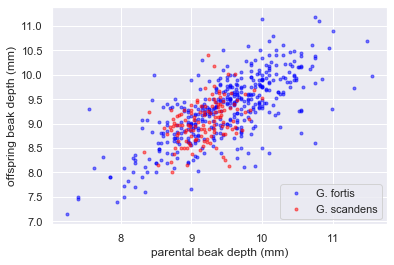

In [80]:
# Make scatter plots
_ = plt.plot(bd_parent_fortis, bd_offspring_fortis,
             marker=".", linestyle="none", color="blue", alpha=.5)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens,
             marker=".", linestyle="none", color="red", alpha=.5)

# Label axes
_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')

# Add legend
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

# Show plot
plt.show()


It appears as though there is a stronger correlation in _G. fortis_ than in _G. scandens_. This suggests that beak depth is more strongly inherited in G. fortis. We'll quantify this correlation

### Correlation of offspring and parental data

In an effort to quantify the correlation between offspring and parent beak depths, we would like to compute statistics, such as the Pearson correlation coefficient, between parents and offspring. To get confidence intervals on this, we need to do a pairs bootstrap.

In [81]:
def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for a single statistic."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates

### Pearson correlation of offspring and parental data

The Pearson correlation coefficient seems like a useful measure of how strongly the beak depth of parents are inherited by their offspring. We'll compute the Pearson correlation coefficient between parental and offspring beak depths for _G. scandens_. And Do the same for _G. fortis_. Then, use the function `draw_bs_pairs` to compute a 95% confidence interval using pairs bootstrap.

In [82]:
# Compute the Pearson correlation coefficients
r_scandens = pearson_r(bd_parent_scandens, bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, pearson_r, size=1000)

bs_replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, pearson_r, size=1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(bs_replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', r_scandens, conf_int_scandens)
print('G. fortis:', r_fortis, conf_int_fortis)


G. scandens: 0.41170636294012586 [0.28114522 0.55186026]
G. fortis: 0.7283412395518486 [0.66716345 0.7791389 ]


It is clear from the confidence intervals that beak depth of the offspring of _G. fortis_ parents is more strongly correlated with their offspring than their _G. scandens_ counterparts.

### Measuring heritability

> Note: Pearson correlation coefficient is the ratio of the covariance to the geometric mean of the variances of the two data sets. 


This is a measure of the correlation between parents and offspring, but might not be the best estimate of heritability. If we stop and think, it makes more sense to define heritability as the ratio of the covariance between parent and offspring to the variance of the parents alone. We will estimate the heritability and perform a pairs bootstrap calculation to get the 95% confidence interval.

> Warning: Statistical inference (and data analysis in general) is not a plug-n-chug enterprise. You need to think carefully about the questions you are seeking to answer with your data and analyze them appropriately. If you are interested in how heritable traits are, the quantity we defined as the heritability is more apt than the off-the-shelf statistic, the Pearson correlation coefficient.

In [83]:
def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0,1] / covariance_matrix[0,0]

# Compute the heritability
heritability_scandens = heritability(bd_parent_scandens, bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(
        bd_parent_scandens, bd_offspring_scandens, heritability, size=1000)
        
replicates_fortis = draw_bs_pairs(
        bd_parent_fortis, bd_offspring_fortis, heritability, size=1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)


G. scandens: 0.5485340868685983 [0.35159687 0.74984943]
G. fortis: 0.7229051911438156 [0.64286124 0.78727894]


Here again, we see that _G. fortis_ has stronger heritability than _G. scandens_. This suggests that the traits of _G. fortis_ may be strongly incorporated into _G. scandens_ by introgressive hybridization.

### Is beak depth heritable at all in G. scandens?

The heritability of beak depth in G. scandens seems low. It could be that this observed heritability was just achieved by chance and beak depth is actually not really heritable in the species. We will test that hypothesis here. To do this, We will do a pairs permutation test.

In [84]:
# Initialize array of replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted, bd_offspring_scandens)


# Compute p-value: p
p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# Print the p-value
print('p-val =', p)


p-val = 0.0


We get a p-value of zero, which means that none of the 10,000 permutation pairs replicates we drew had a heritability high enough to match that which was observed. This strongly suggests that beak depth is heritable in _G. scandens_, just not as much as in _G. fortis_. If you like, you can plot a histogram of the heritability replicates to get a feel for how extreme of a value of heritability you might expect by chance.

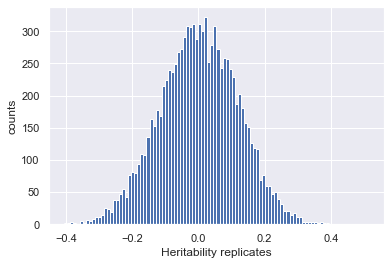

In [87]:
_ = plt.hist(perm_replicates, bins = int(np.sqrt(len(perm_replicates))))
_ = plt.ylabel("counts")
_ = plt.xlabel("Heritability replicates")
plt.show()